# Frequency analysis of cutting signal

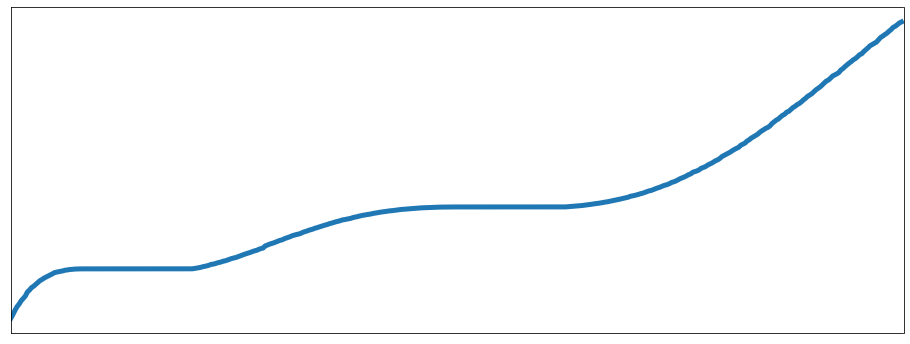

47.97269734423405
95.93967138885652
47.9521409810877
47.986477972584034
31.977642844064018
287.7806887597996
48.003598275826164
47.93160222725238
###############################
47.962450222826966
1000.0043957315135
95.92050996122032
47.97622496378802
31.980097496372323
47.99160612053711
95.98068126304571
23.984119321492187
###############################
111545.65161290322
24823.511844938977
20328.719576719577
31929.04155124654
17195.003480855295
14904.806896551725
13152.967668314948
11769.622872702519
###############################
aa (222912, 7)
287.62580645161296
95.95781317262161
143.99870801033592
31.981348637015785
23.98687183901862
71.95287282117495
47.95826161790017
15.990674318507892
###############################
999.5964125560539
47.968581880783304
95.95781317262161
31.981348637015785
19.188258586554188
23.98687183901862
143.9057456423499
332.7014925373134
###############################
287.99741602067184
95.95781317262161
867.3540856031129
143.9057456423499
487.76805251

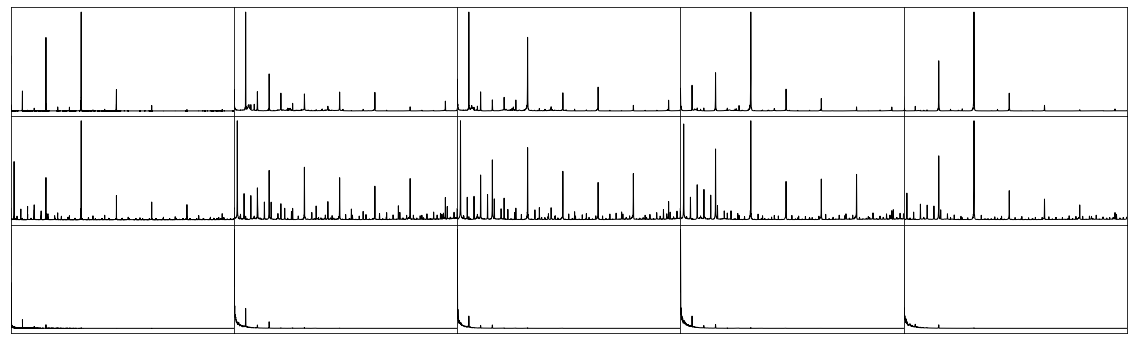

In [1]:
#The average frequency spectrum during machining and the frequency spectrum of various tool wear stages 2021.6.2

import numpy as np
import pandas as pd
import random
import scipy.signal
import time
import xlrd
import os
import matplotlib.pyplot as plt
import numpy.fft as fft


INTERPOLATION_NUM = 10
TIME_STEPS=300    #所需数据时间序列长度
DATA_CHANNEL=7      #读取原始数据集的通道数

DATA_LOADPATH = 'tool_wear/c4/c4/c_4_' #训练集数据读取路径
TESTLABEL_LOADPATH =  'tool_wear_data_5_small/test_label.npy' #验证集标签读取路径

SAVEPATH = 'fourier/signal_fourier'
LABEL_SAVEPATH = 'fourier/label.png'


sample_list1 = [43, 138, 230, 378]
sample_list = np.int32(np.array(sample_list1)/428*313)
signal_list = [0, 3, 6]
####################################数据读取及处理###################################################################################
def gaussian_filtering(variation, filter_length, input_x):   #一维高斯滤波，输入均值、方差和输入
    filter_x = np.array(np.arange(-filter_length/2,filter_length/2))
    gauss_filter = np.exp(-pow(filter_x, 2)/(2*pow(variation, 2)))/(variation*np.sqrt(2*np.pi))
    gauss_filter = gauss_filter/np.sum(gauss_filter)
#     plt.plot(gauss_filter)
#     plt.show()
    filted_signal = np.convolve(input_x, gauss_filter, mode='same')
    return filted_signal
    
#读取训练集或验证集数据
def train_set_read(data_path, index_start, index_stop, step = 1):#输入起始索引和终止索引
    flag = 0
    for i in range(index_start, index_stop, step):   #忽略首次和末次切割
        if i < 10:
            data_path1 = data_path + '00' + str(i) + '.csv'
        elif i >= 10 and i < 100:
            data_path1 = data_path + '0' + str(i) + '.csv'
        else:
            data_path1 = data_path + str(i) + '.csv'
        if os.path.getsize(data_path1):  #检验是否为空文件
            train_data_read = np.array(pd.read_csv(data_path1, header = None))#这里可加入预处理环节
            train_data_read = train_data_read[:, 0:DATA_CHANNEL]
            if flag == 0:
                X_train = train_data_read
                flag = 1
            else:
                X_train = np.concatenate([X_train, train_data_read])
    return X_train


#############################################################################################################################
time_start = time.time()

Y_test = np.load(TESTLABEL_LOADPATH)
fig_x = 16
fig_y = 6
plt.figure(figsize=(fig_x, fig_y))
plt.plot(Y_test[427:855,0], linewidth = 5)
plt.xlim(0, np.shape(Y_test[427:855,0])[0])
plt.xticks([])
plt.yticks([])
plt.savefig(LABEL_SAVEPATH, dpi = 300, bbox_inches='tight')
plt.show()

fig_index = 0
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 6))
fig.subplots_adjust(wspace=0, hspace=0)
axs = axs.flatten()

######平均######################################################
data = train_set_read(DATA_LOADPATH, 2, 314, 2)
for i in range(np.shape(signal_list)[0]):#绘制Fourier频谱
    complex_array = fft.fft(data[:, signal_list[i]])
    # 得到分解波的频率序列
    freqs = fft.fftfreq(np.shape(data)[0])
    # 复数的模为信号的振幅（能量大小）
    pows = np.abs(complex_array)
    pows = pows[freqs > 0]
    freqs = freqs[freqs > 0]
    x=np.arange(0,25000,25000/np.shape(pows)[0])[:np.shape(pows)[0]]
    pows = gaussian_filtering(5, 1000, pows) #gauss加窗
    pows = pows[x < 3300]
    x = x[x < 3300]

    axs[5*i].plot(pows, color = 'black', linewidth = 1)
    axs[5*i].set_xticks([])
    axs[5*i].set_yticks([])
    axs[5*i].set_xlim(0, np.shape(pows)[0])
    limit = 20
    for k in range(8):
        index = np.int(np.argwhere(pows == np.max(pows[10*limit:-10*limit]))[0])
        pows[index-10*limit:index+10*limit] = np.zeros(20*limit)
        print(50000/x[index])
    print('###############################')



for j in range(np.shape(sample_list)[0]):
    data = train_set_read(DATA_LOADPATH, sample_list[j], sample_list[j]+1)
    print('aa', np.shape(data))
    col_index = 0
    for i in range(np.shape(signal_list)[0]):#绘制Fourier频谱
        complex_array = fft.fft(data[:, signal_list[i]])
        # 得到分解波的频率序列
        freqs = fft.fftfreq(np.shape(data)[0])
        # 复数的模为信号的振幅（能量大小）
        pows = np.abs(complex_array)
        pows = pows[freqs > 0]
        freqs = freqs[freqs > 0]
        x=np.arange(0,25000,25000/np.shape(pows)[0])[:np.shape(pows)[0]]
        pows = gaussian_filtering(5, 1000, pows) #gauss加窗
        pows = pows[x < 3300]
        x = x[x < 3300]
        
        axs[j+5*col_index+1].plot(pows, color = 'black', linewidth = 1)
        axs[j+5*col_index+1].set_xticks([])
        axs[j+5*col_index+1].set_yticks([])
        axs[j+5*col_index+1].set_xlim(0, np.shape(pows)[0])
        limit = 20
        for k in range(8):
            index = np.int(np.argwhere(pows == np.max(pows[10*limit:-10*limit]))[0])
            pows[index-10*limit:index+10*limit] = np.zeros(20*limit)
            print(50000/x[index])
        col_index+=1
        print('###############################')
        
plt.savefig(SAVEPATH, dpi = 400, bbox_inches='tight')
plt.show()

(2304, 7)


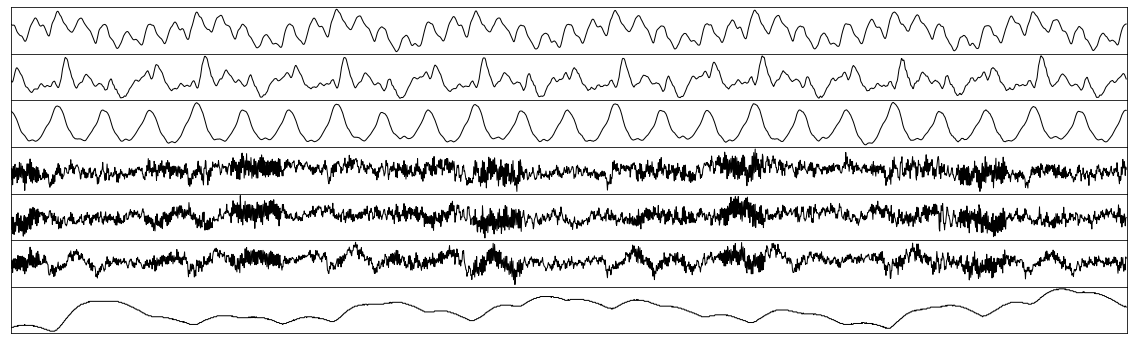

In [12]:
#The average frequency spectrum during machining and the frequency spectrum of various tool wear stages 2021.6.2

import numpy as np
import pandas as pd
import random
import scipy.signal
import time
import xlrd
import os
import matplotlib.pyplot as plt
import numpy.fft as fft

DATA_LOADPATH = 'tool_wear/c4/c4/c_4_' #训练集数据读取路径
SIG_SAVEPATH = 'fourier/signal.png'


####################################数据读取及处理###################################################################################
#读取训练集或验证集数据
def train_set_read(data_path, index):#输入起始索引和终止索引
    if index < 10:
        data_path1 = data_path + '00' + str(index) + '.csv'
    elif index >= 10 and index < 100:
        data_path1 = data_path + '0' + str(index) + '.csv'
    else:
        data_path1 = data_path + str(index) + '.csv'
    if os.path.getsize(data_path1):  #检验是否为空文件
        train_data_read = np.array(pd.read_csv(data_path1, header = None))#这里可加入预处理环节
        train_data_read = train_data_read[:, 0:DATA_CHANNEL]
    return train_data_read

#############################################################################################################################
time_start = time.time()

data = train_set_read(DATA_LOADPATH, 100)
data = data[np.int32(np.shape(data)[0]/2):np.int32(np.shape(data)[0]/2)+2304]
print(np.shape(data))
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(20, 6))
fig.subplots_adjust(wspace=0, hspace=0)
axs = axs.flatten()
for i in range(7):
    axs[i].plot(data[:, i], color = 'black', linewidth = 1)
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_xlim(0, np.shape(data)[0])

plt.savefig(SIG_SAVEPATH, dpi = 800, bbox_inches='tight')
plt.show()

        